In [1]:
# !pip install pandas-datareader
import pandas_datareader.data as web
import datetime

# Problem 1
## a.

In [2]:
def retrieve_kf():
    start = datetime.datetime(1980, 1, 1)
    end = datetime.datetime(2021, 12, 31)
    df = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start=start, end=end)[0]
    df['MOM'] = web.DataReader('F-F_Momentum_Factor', 'famafrench', start=start, end=end)[0]
    
    factors = df.drop(columns=['RF'])
    
    portfolios = web.DataReader('17_Industry_Portfolios', 'famafrench', start=start, end=end)[0]
    portfolios.iloc[:,:] = portfolios.iloc[:,:].values - df[['RF']].values
    
    return factors, portfolios


In [3]:
factors, portfolios = retrieve_kf()
factors

,Mkt-RF,SMB,HML,RMW,CMA,MOM
Date,,,,,,
1980-01,5.51,1.83,1.75,-1.70,1.64,7.55
1980-02,-1.22,-1.57,0.61,0.04,2.68,7.88
1980-03,-12.90,-6.93,-1.01,1.46,-1.19,-9.55
1980-04,3.97,1.05,1.06,-2.10,0.29,-0.43
1980-05,5.26,2.11,0.38,0.34,-0.31,-1.12
...,...,...,...,...,...,...
2021-08,2.91,-0.68,-0.15,-0.28,-1.79,2.45
2021-09,-4.37,1.12,5.08,-1.96,2.10,1.49
2021-10,6.65,-2.70,-0.49,1.66,-1.45,3.19


In [4]:
portfolios

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
1980-01,3.06,12.97,13.08,2.03,3.92,3.19,-3.10,7.99,16.77,6.44,6.95,9.96,15.27,0.76,-0.63,1.32,3.09
1980-02,-6.17,2.88,12.11,-1.78,-6.19,-2.49,-4.90,-2.99,-0.76,-1.91,-4.71,-7.34,-7.45,-4.28,-6.24,-5.96,-2.25
1980-03,-10.17,-19.94,-19.08,-10.27,-6.76,-13.28,-4.01,-16.05,-19.85,-17.91,-13.97,-10.76,-14.12,-7.80,-9.27,-10.10,-10.98
1980-04,5.89,-1.79,5.58,2.45,0.94,3.58,3.80,2.78,1.05,2.75,-1.16,-4.16,-1.89,10.74,3.49,5.55,5.22
1980-05,7.13,8.97,3.33,3.02,4.98,6.68,7.23,8.06,4.36,4.87,4.07,2.24,5.04,3.78,9.51,7.08,5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,-0.29,-2.58,-1.35,-0.56,-3.69,0.02,2.27,1.83,3.54,5.23,3.51,1.98,-1.05,3.23,3.00,2.85,3.93
2021-09,-3.28,-8.10,11.30,-9.11,-7.99,-4.63,-5.88,-3.67,-10.64,-5.60,-5.72,4.04,-2.45,-4.86,-5.19,-1.55,-5.77
2021-10,3.66,8.68,10.30,11.73,3.52,7.66,3.61,11.44,10.13,3.73,7.57,30.90,6.31,5.11,3.54,7.08,5.57


## b.

### Descriptive statistics

In [5]:
from linearmodels.asset_pricing import TradedFactorModel
mod = TradedFactorModel(portfolios, factors)
res = mod.fit()
res

TradedFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 17   R-squared:                      0.6667
No. Factors:                          6   J-statistic:                    40.222
No. Observations:                   504   P-value                         0.0012
Date:                  Mon, Apr 15 2024   Distribution:                 chi2(17)
Time:                          15:28:31                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.7393     0.1996     3.7030     0.0002      0.3480      1.1306
SMB            0.1004     0.1296     0.7747     0.4385     -0.1537      0.3545
HML            0.1950     0.1363     1.4309     0.1525     -0.0721      0.4621
RMW            0.3791     0.1070     3.5431     0.0004      0.1694      0.5889
CMA            0.2546     0.0885     2.8772     0.0040      0.0812      0.4280
MOM            0.5372     0.1996     2.6908     0.0071      0.1459      0.9284
==============================================================================

Covariance estimator:
HeteroskedasticCovariance
See full_summary for complete results
LinearFactorModelResults, id: 0x1e5a4d54a60

In [6]:
res.betas

,Mkt-RF,SMB,HML,RMW,CMA,MOM
Food,0.790752,-0.107736,-0.087091,0.538351,0.452120,0.016742
Mines,1.029600,0.430505,-0.024923,0.051182,0.498881,-0.012722
Oil,1.012638,0.127117,0.397121,0.255264,0.234534,0.021329
Clths,1.048322,0.485833,0.110302,0.699648,-0.065294,-0.217666
Durbl,1.083535,0.384256,0.037836,0.362322,0.292671,-0.183685
Chems,1.142255,0.133647,0.191826,0.362438,0.193440,-0.137149
Cnsum,0.813650,-0.305900,-0.300018,0.364758,0.538516,-0.004446
Cnstr,1.201702,0.266015,0.139296,0.359541,0.089993,0.014668
Steel,1.341755,0.467829,0.213553,-0.215934,0.149513,-0.184881
FabPr,1.024739,0.427519,0.023269,0.548691,0.095438,-0.152301


### Graphs

<AxesSubplot:title={'center':'Correlation Matrix of Factors and Portfolios'}>

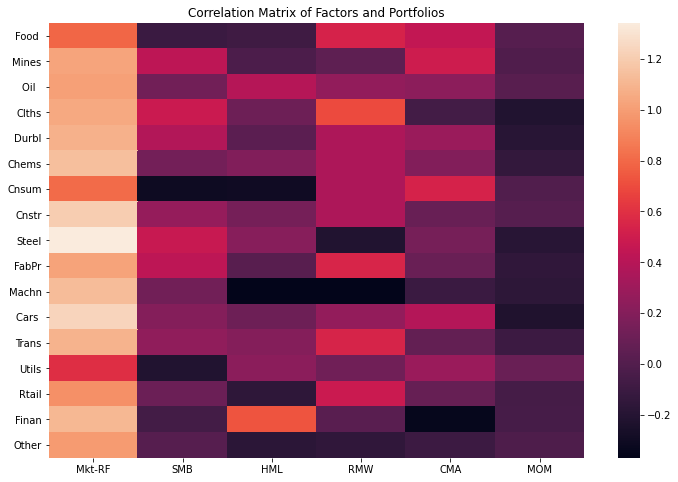

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Factors and Portfolios')
sns.heatmap(res.betas)

## c.

In [20]:
from linearmodels.asset_pricing import LinearFactorModel
import statsmodels.api as sm

def asset_price_mod(factors, portfolios, traded):
    if not traded:
        factors = sm.add_constant(factors)  
    mod = LinearFactorModel(portfolios, factors)
    res = mod.fit()
    
    risk_premia = res.risk_premia 
    tstats_risk_premia = res.risk_premia_tstats
    loadings = res.betas
    tstats = res.tstats
    R2 = res.rsquared
    jstat = res.j_statistic.stat
    p_value = res.j_statistic.pval
    df = len(portfolios) - factors.shape[1] - 1
    
    return risk_premia, tstats_risk_premia, loadings, tstats, R2, [jstat, p_value, df]

In [21]:
risk_premia, tstats_risk_premia, loadings, tstats, R2, jtest_stats = asset_price_mod(factors, portfolios, True)

In [22]:
risk_premia

Mkt-RF    0.814325
SMB      -0.521846
HML      -0.323435
RMW       0.394233
CMA      -0.194653
MOM       0.327526
dtype: float64

In [11]:
tstats_risk_premia

Mkt-RF    3.980475
SMB      -1.418339
HML      -1.515546
RMW       1.577961
CMA      -0.690101
MOM       0.431648
dtype: float64

In [12]:
loadings

,Mkt-RF,SMB,HML,RMW,CMA,MOM
Food,0.790752,-0.107736,-0.087091,0.538351,0.452120,0.016742
Mines,1.029600,0.430505,-0.024923,0.051182,0.498881,-0.012722
Oil,1.012638,0.127117,0.397121,0.255264,0.234534,0.021329
Clths,1.048322,0.485833,0.110302,0.699648,-0.065294,-0.217666
Durbl,1.083535,0.384256,0.037836,0.362322,0.292671,-0.183685
Chems,1.142255,0.133647,0.191826,0.362438,0.193440,-0.137149
Cnsum,0.813650,-0.305900,-0.300018,0.364758,0.538516,-0.004446
Cnstr,1.201702,0.266015,0.139296,0.359541,0.089993,0.014668
Steel,1.341755,0.467829,0.213553,-0.215934,0.149513,-0.184881
FabPr,1.024739,0.427519,0.023269,0.548691,0.095438,-0.152301


In [13]:
tstats

,alpha,Mkt-RF,SMB,HML,RMW,CMA,MOM
Food,0.256887,21.911678,-1.950868,-1.576710,7.799296,5.084041,0.422850
Mines,0.612754,13.049267,3.690897,-0.178800,0.314879,2.149535,-0.169156
Oil,-0.285230,15.404220,1.350847,2.640196,2.104417,1.196281,0.321010
Clths,0.967770,23.082611,6.914782,1.372948,8.210444,-0.546174,-5.371218
Durbl,-0.618150,29.770942,7.379998,0.560310,5.079587,3.074224,-3.958163
Chems,-0.914453,29.513403,2.588451,2.556662,5.374791,1.772663,-3.017320
Cnsum,-0.795384,23.939326,-5.410089,-4.751068,4.594950,5.297737,-0.093456
Cnstr,-0.002412,34.501198,5.165225,2.162420,4.799616,0.834563,0.362984
Steel,-0.580150,23.770955,5.525679,2.014504,-1.864677,0.921743,-3.213800
FabPr,-0.039546,29.540094,7.486499,0.391756,6.552127,1.033369,-3.937015


In [14]:
R2

0.6666668101066995

In [15]:
jtest_stats

[4.889228954842638, 0.9364121184829374, 497]

# Problem 2

# a

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

def calculate_log_likelihood(df, dof):
    Y = df.iloc[:, 0]
    X = sm.add_constant(df.iloc[:, 1:])
    
    # OLS regression
    model = sm.OLS(Y, X)
    results = model.fit()
    
    #  regression residuals
    residuals = results.resid
    std_dev = np.std(residuals)
    
    # residuals
    standardized_residuals = residuals / std_dev
    
    # log-likelihood
    llf = np.sum(t.logpdf(standardized_residuals, dof))
    
    return llf

# Load PJM data
df = pd.read_csv('PJM.csv', index_col='Date')

# llf
llf = calculate_log_likelihood(df, dof=5)

print(llf)

-60365.50256606266


# b

In [1]:
from scipy.stats import chi2
import pandas as pd
import statsmodels.api as sm
import numpy as np

def calculate_LR_and_pval(df, dof):
    Y = df.iloc[:, 0]
    X = sm.add_constant(df.iloc[:, 1:])

    model_all = sm.OLS(Y, X)
    results_all = model_all.fit()
    llf_all = results_all.llf

    X_const = sm.add_constant(df.iloc[:, 1]*0)
    model_const = sm.OLS(Y, X_const)
    results_const = model_const.fit()
    llf_const = results_const.llf

    #  LR statistic
    LR = -2 * (llf_const - llf_all)

    # p-value
    pval = chi2.sf(LR, df=df.shape[1]-1)

    return LR, pval

#PJM data
df = pd.read_csv('PJM.csv')
df = df.drop(df.columns[0], axis=1)
# LR and p-value
LR, pval = calculate_LR_and_pval(df, df.shape[1]-1)

print(f"LR: {LR}, p-value: {pval}")


LR: 15989.93629191746, p-value: 0.0


# c

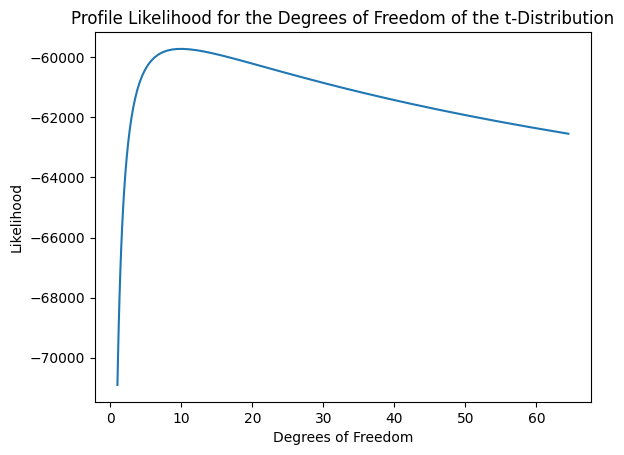

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_profile_likelihood(df):
    results = np.zeros((51, 2))

    # Loop over j from 0 to 50
    for j in range(51):
        #  dof
        dof = np.exp(j / 12)

        #  likelihood using 'calculate_log_likelihood'
        likelihood = calculate_log_likelihood(df, dof)
        results[j, 0] = dof
        results[j, 1] = likelihood

    return results

# PJM
df = pd.read_csv('PJM.csv')
df = df.drop(df.columns[0], axis=1)

results = create_profile_likelihood(df)
# Plot 
plt.plot(results[:, 0], results[:, 1])
plt.xlabel('Degrees of Freedom')
plt.ylabel('Likelihood')
plt.title('Profile Likelihood for the Degrees of Freedom of the t-Distribution')
plt.show()

# d

In [ ]:
# Find the index of the maximum likelihood
mle_index = np.argmax(results[:, 1])
mle_dof = results[mle_index, 0]

print(f'The MLE estimate of the degrees of freedom is {mle_dof}')

The MLE estimate of the degrees of freedom is 10.312258501325767
